# Part 3 - Production Scale: Horse or Human, with Google InceptionV3 model through Transfer Learning


This is the final part of 3-parts series for Convolutional Neural Networks. 
1. Basics: binary classification and "Convolution" visualized as transformations through DNN-layers
2. Step up: multi-class classification with Rock, Paper, Scissors 
3. Production Scale: Horse or Human with Image Augmentation, through convolutions, and Transfer Learning (this part)

Specifically in this part, we will leverage the Version 3 of "Inception" model from Google, which is trained on more than 1million images from ImageNet. 
1. Load a set of computer generated Horse/Human images from  https://storage.googleapis.com/laurencemoroney-blog.appspot.com
2. Preprocessing and image Augmentations with `keras.preprocessing.image.ImageDataGenerator` to prepare train/validation data
3. Build the basic model
4. Visualize  image transformations through each iterations of "Convolution"
5. Train and evaluate accuracy/loss 
6. Apply transferred learning for large-scale, massive neural-networks



# 1. Dataset

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O validation-horse-or-human.zip

--2022-04-03 20:07:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 142.250.81.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: 'horse-or-human.zip'

     0K .......... .......... .......... .......... ..........  0% 1.94M 73s
    50K .......... .......... .......... .......... ..........  0% 13.1M 42s
   100K .......... .......... .......... .......... ..........  0% 6.43M 35s
   150K .......... .......... .......... .......... ..........  0% 14.2M 29s
   200K .......... .......... .......... .......... ..........  0% 9.31M 26s
   250K .......... .......... .......... .......... ..........  0% 14.2M 24s
   300K .......... .......... .......... .......... ..........  0% 17.8M 21s
   350K .......... 

  8450K .......... .......... .......... .......... ..........  5% 34.3M 7s
  8500K .......... .......... .......... .......... ..........  5% 49.5M 7s
  8550K .......... .......... .......... .......... ..........  5% 10.4M 7s
  8600K .......... .......... .......... .......... ..........  5% 36.5M 7s
  8650K .......... .......... .......... .......... ..........  5% 45.1M 7s
  8700K .......... .......... .......... .......... ..........  5% 39.5M 7s
  8750K .......... .......... .......... .......... ..........  6% 18.1M 7s
  8800K .......... .......... .......... .......... ..........  6% 13.8M 7s
  8850K .......... .......... .......... .......... ..........  6% 38.1M 7s
  8900K .......... .......... .......... .......... ..........  6% 38.2M 7s
  8950K .......... .......... .......... .......... ..........  6% 19.5M 7s
  9000K .......... .......... .......... .......... ..........  6%  153M 7s
  9050K .......... .......... .......... .......... ..........  6% 15.8M 7s
  9100K ....

 74600K .......... .......... .......... .......... .......... 51% 22.0M 3s
 74650K .......... .......... .......... .......... .......... 51% 40.1M 3s
 74700K .......... .......... .......... .......... .......... 51% 53.3M 3s
 74750K .......... .......... .......... .......... .......... 51% 19.1M 3s
 74800K .......... .......... .......... .......... .......... 51% 32.1M 3s
 74850K .......... .......... .......... .......... .......... 51% 38.9M 3s
 74900K .......... .......... .......... .......... .......... 51% 46.7M 3s
 74950K .......... .......... .......... .......... .......... 51% 34.6M 3s
 75000K .......... .......... .......... .......... .......... 51% 20.8M 3s
 75050K .......... .......... .......... .......... .......... 51% 30.0M 3s
 75100K .......... .......... .......... .......... .......... 51% 34.8M 3s
 75150K .......... .......... .......... .......... .......... 51% 34.0M 3s
 75200K .......... .......... .......... .......... .......... 51% 15.1M 3s
 75250K ....

--2022-04-03 20:08:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 142.250.81.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: 'validation-horse-or-human.zip'

     0K .......... .......... .......... .......... ..........  0% 2.20M 5s
    50K .......... .......... .......... .......... ..........  0% 2.14M 5s
   100K .......... .......... .......... .......... ..........  1% 1.42M 6s
   150K .......... .......... .......... .......... ..........  1% 1.17M 7s
   200K .......... .......... .......... .......... ..........  2% 10.3M 6s
   250K .......... .......... .......... .......... ..........  2% 3.85M 5s
   300K .......... .......... .......... .......... ..........  3% 3.23M 5s
   350

  6450K .......... .......... .......... .......... .......... 57% 10.9M 1s
  6500K .......... .......... .......... .......... .......... 58% 33.7M 1s
  6550K .......... .......... .......... .......... .......... 58% 33.4M 1s
  6600K .......... .......... .......... .......... .......... 59% 18.5M 1s
  6650K .......... .......... .......... .......... .......... 59% 22.5M 1s
  6700K .......... .......... .......... .......... .......... 60% 26.6M 1s
  6750K .......... .......... .......... .......... .......... 60% 17.7M 1s
  6800K .......... .......... .......... .......... .......... 61% 13.2M 1s
  6850K .......... .......... .......... .......... .......... 61% 18.0M 1s
  6900K .......... .......... .......... .......... .......... 61% 21.5M 1s
  6950K .......... .......... .......... .......... .......... 62% 12.2M 1s
  7000K .......... .......... .......... .......... .......... 62% 22.3M 1s
  7050K .......... .......... .......... .......... .......... 63% 26.8M 1s
  7100K ....

In [2]:
import os
import zipfile

training_dir = 'horse-or-human/training/'
validation_dir = 'horse-or-human/validation/'

In [3]:
training_file_name = "horse-or-human.zip"
zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

validation_file_name = "validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join(training_dir, 'horses')

# Directory with our training human pictures
train_human_dir = os.path.join(training_dir, 'humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join(validation_dir, 'horses')

# Directory with our training human pictures
validation_human_dir = os.path.join(validation_dir, 'humans')

train_horse_names = os.listdir(train_horse_dir)
print("10 train_horse_names", train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print("10 train_human_names", train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print("10 validation_horse_hames", validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print("10 validation_human_names", validation_human_names[:10])

10 train_horse_names ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
10 train_human_names ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
10 validation_horse_hames ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
10 validation_human_names ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


# 2. Image Augmentations

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  
        target_size=(300, 300),  # 300x300 for basic_model 
        batch_size=128,
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# 3. Basic Model 

In [6]:
import tensorflow as tf

basic_model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [7]:
from tensorflow.keras.optimizers import RMSprop

basic_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

# 4. Visualize image transformations through each "Convolutions"

See how an input gets transformed as it goes through the model 
1. Pick a random image from the training set
2. Generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output `feature map`. 
3. Rerun this cell to generate intermediate representations for a variety of training images.

radomly picked image


C:\Users\johnj\AppData\Local\Temp/ipykernel_5240/3771281789.py:56: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


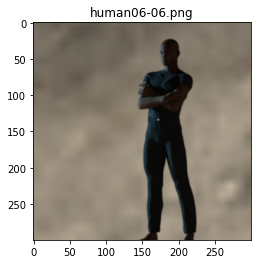

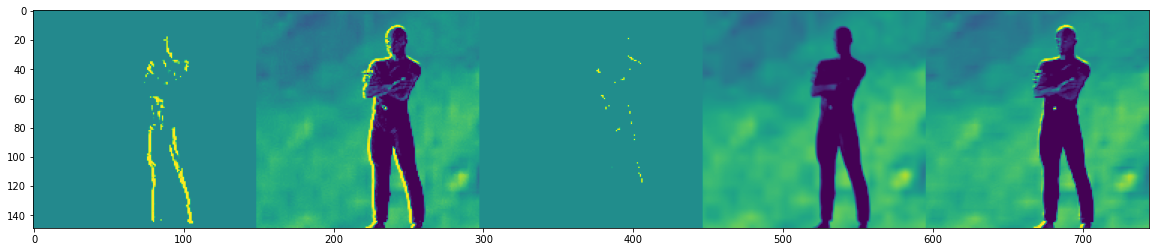

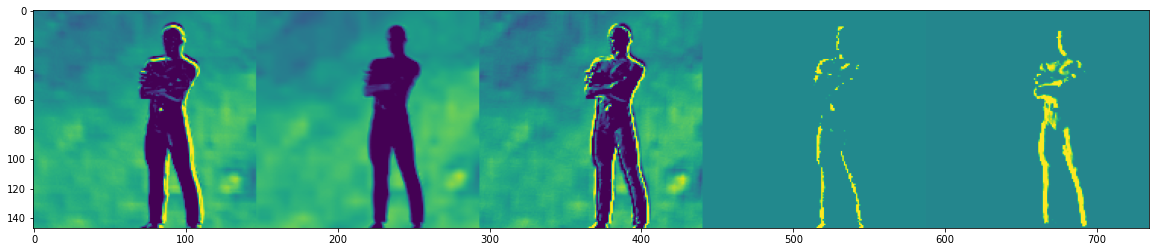

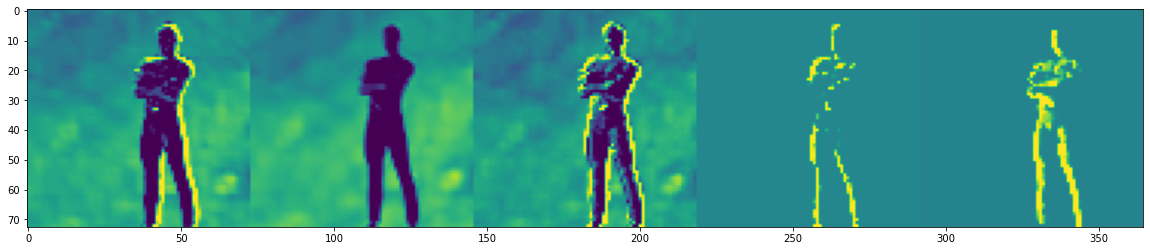

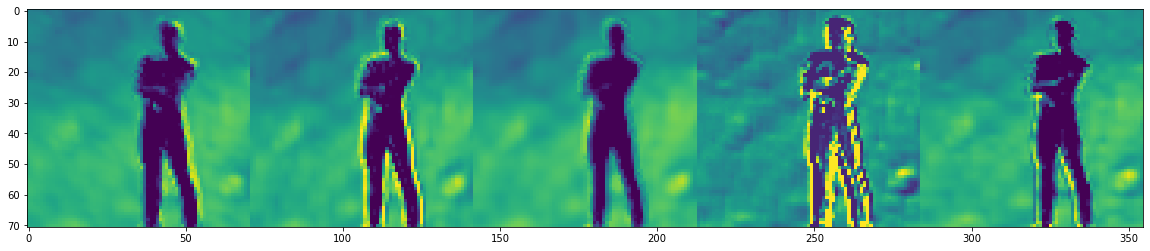

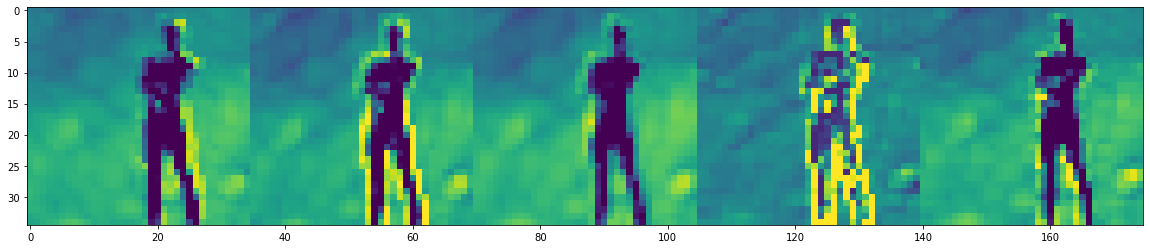

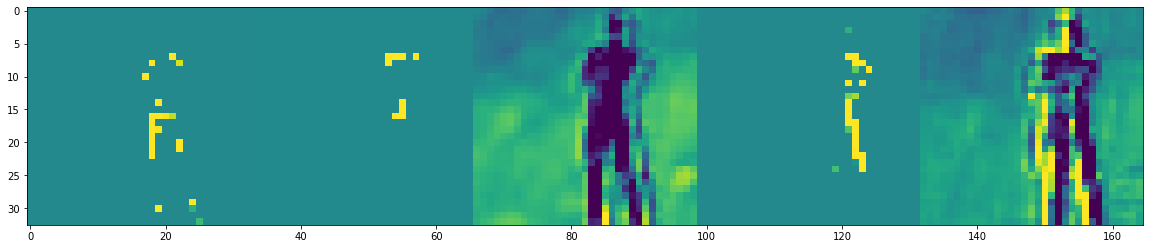

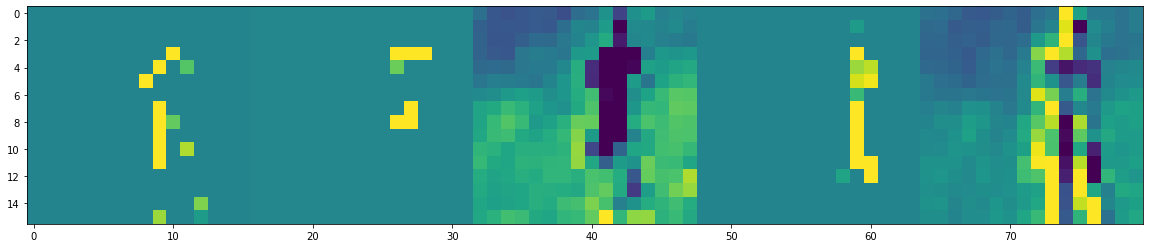

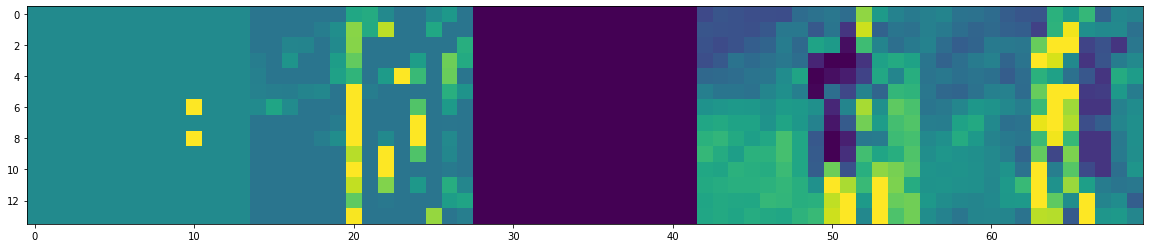

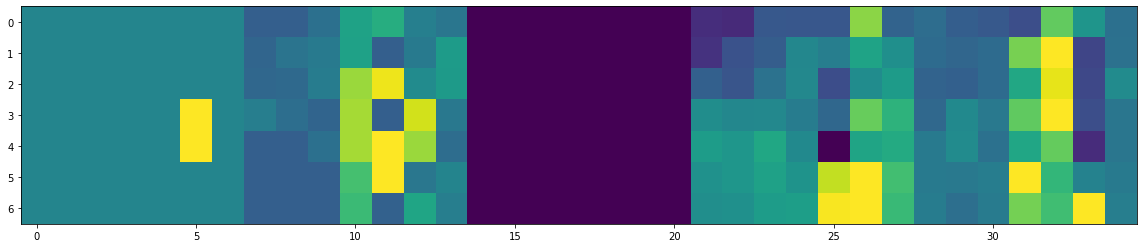

In [8]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = mpimg.imread(img_path)
plt.title(img_path.rsplit('\\',1)[1])
plt.imshow(img)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255


# Define a new Model that will take an image as input
# Output intermediate representations for all layers after that
successive_outputs = [layer.output for layer in basic_model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = basic_model.input, outputs = successive_outputs)


# Run the image through the network, thus obtaining all intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# Get names of the layers
layer_names = [layer.name for layer in basic_model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = 5
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    #plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 5. Training the basic model

In [9]:
basic_history = basic_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 186s 19s/step - loss: 1.1438 - acc: 0.4805 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 139s 16s/step - loss: 0.7006 - acc: 0.5406 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 130s 15s/step - loss: 0.6839 - acc: 0.5907 - val_loss: 0.6842 - val_acc: 0.4805
Epoch 4/15
8/8 [==============================] - 113s 14s/step - loss: 0.8330 - acc: 0.6051 - val_loss: 0.6704 - val_acc: 0.7461
Epoch 5/15
8/8 [==============================] - 121s 15s/step - loss: 0.5911 - acc: 0.6819 - val_loss: 1.3418 - val_acc: 0.5117
Epoch 6/15
8/8 [==============================] - 118s 14s/step - loss: 1.1197 - acc: 0.6541 - val_loss: 0.7420 - val_acc: 0.4844
Epoch 7/15
8/8 [==============================] - 124s 18s/step - loss: 0.5820 - acc: 0.6730 - val_loss: 0.6757 - val_acc: 0.5859
Epoch 8/15
8/8 [==============================] - 135s 16s/step - loss: 0.5335 - acc: 0.71

# 6. Plot accuracy/loss

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

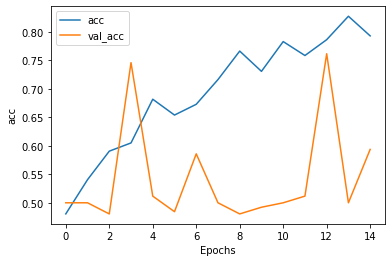

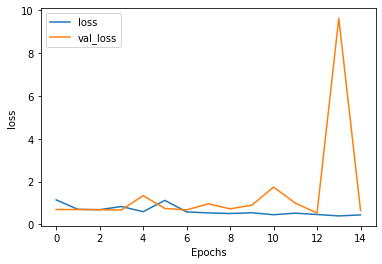

In [11]:
plot_graphs(basic_history, "acc")
plot_graphs(basic_history, "loss")

# 7. Transfer Learning 

The ability to leverage pre-trained models is tremendously advantageous, since one could skip weeks of training time of very deep networks. One could just use the features it has learned, tweak against for your dataset and apply own necessary/dense layers. 

In our case, we will 
1. Get the `InceptionV3` pre-trained model
2. Set the input shape: 150x150x3 (feel free to set to larger-size i.e. through GCP/AWS/Azure) 
3. Pick and freeze the convolution layers to take advantage of the features it has learned 
4. Add dense layers

Note that
1. Fetch the pretrained weights of the InceptionV3 model 
2. Remove the fully connected layer at the end since we will replace it
3. pecify the input shape that your model will accept. Lastly, you want to freeze the weights of these layers because they have been trained already.

### Set input data of 150x150 (feel free to set to larger-size i.e. through GCP/AWS/Azure) 

In [12]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  
        target_size=(150, 150),  # 300x300 for basic_model 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Import `Inception` model

In [13]:
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.optimizers import RMSprop

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_25 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_39 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_39[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_40 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_50 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_50[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_46

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_56[0][0]']              
 ormalizat

 conv2d_66 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_71[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_76 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_89[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

### Pick the convolution layer

In [14]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

pretrained_model = Model(pre_trained_model.input, x)

pretrained_model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

pretrained_model.summary()

last layer output shape:  (None, 7, 7, 768)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                                                

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 batch_normalization_17 (BatchN  (None, 16, 16, 96)  288         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_18 (BatchN  (None, 16, 16, 64)  192         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_12 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_12[0][0]'] 
                                                                                                  
 activation_14 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_14[0][0]'] 
                                                                                                  
 activatio

 conv2d_33 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_27[0][0]']          
                                                                                                  
 batch_normalization_28 (BatchN  (None, 16, 16, 96)  288         ['conv2d_33[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_28 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_28[0][0]'] 
                                                                                                  
 conv2d_31 (Conv2D)             (None, 7, 7, 384)    995328      ['mixed2[0][0]']                 
                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 96)     82944       ['activation_28[0][0]']          
          

 batch_normalization_33 (BatchN  (None, 7, 7, 192)   576         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_38 (BatchN  (None, 7, 7, 192)   576         ['conv2d_43[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_39 (BatchN  (None, 7, 7, 192)   576         ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_30 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_30[0][0]'] 
          

                                                                                                  
 batch_normalization_49 (BatchN  (None, 7, 7, 192)   576         ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_40 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 activation_43 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_43[0][0]'] 
                                                                                                  
 activation_48 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_53 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_53[0][0]'] 
                                                                                                  
 activation_58 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 activation_59 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 mixed6 (Concatenate)           (None, 7, 7, 768)    0           ['activation_50[0][0]',          
                                                                  'activation_53[0][0]',          
                                                                  'activation_58[0][0]',          
          

 activation_69 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 mixed7 (Concatenate)           (None, 7, 7, 768)    0           ['activation_60[0][0]',          
                                                                  'activation_63[0][0]',          
                                                                  'activation_68[0][0]',          
                                                                  'activation_69[0][0]']          
                                                                                                  
 flatten_1 (Flatten)            (None, 37632)        0           ['mixed7[0][0]']                 
                                                                                                  
 dense_2 (Dense)                (None, 1024)         38536192    ['flatten_1[0][0]']              
          

In [15]:
pretrained_history = pretrained_model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=20)

Epoch 1/20
52/52 [==============================] - 71s 1s/step - loss: 0.1686 - acc: 0.9396 - val_loss: 0.0296 - val_acc: 0.9922
Epoch 2/20
52/52 [==============================] - 63s 1s/step - loss: 0.0260 - acc: 0.9912 - val_loss: 0.2377 - val_acc: 0.9414
Epoch 3/20
52/52 [==============================] - 62s 1s/step - loss: 0.0173 - acc: 0.9932 - val_loss: 0.0925 - val_acc: 0.9648
Epoch 4/20
52/52 [==============================] - 65s 1s/step - loss: 0.0230 - acc: 0.9903 - val_loss: 0.1310 - val_acc: 0.9688
Epoch 5/20
52/52 [==============================] - 64s 1s/step - loss: 0.0110 - acc: 0.9971 - val_loss: 0.1199 - val_acc: 0.9688
Epoch 6/20
52/52 [==============================] - 65s 1s/step - loss: 0.0090 - acc: 0.9971 - val_loss: 0.2216 - val_acc: 0.9453
Epoch 7/20
52/52 [==============================] - 65s 1s/step - loss: 0.0131 - acc: 0.9951 - val_loss: 0.0568 - val_acc: 0.9805
Epoch 8/20
52/52 [==============================] - 68s 1s/step - loss: 0.0072 - acc: 0.99

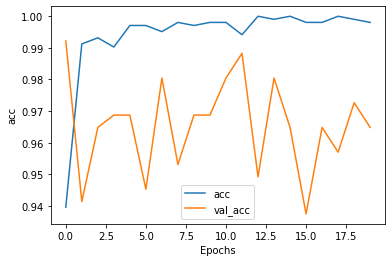

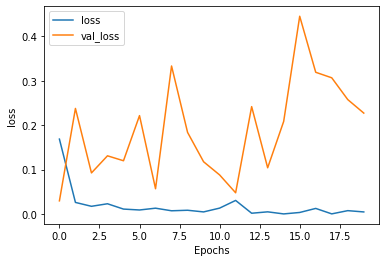

In [16]:
plot_graphs(pretrained_history, "acc")
plot_graphs(pretrained_history, "loss")

# 8. Prediction 


In [17]:
from ipywidgets import FileUpload

def on_upload_change(change):
#    print("change is", change)
    if not change.new:
        return
    up = change.owner
    for uploadFile,data in up.value.items():
        print(f'getting [{uploadFile}]')
        with open(uploadFile, 'wb') as f:
            f.write(data['content'])
    up.value.clear()
    up._counter = 0

upload_btn = FileUpload()
uploadFile = upload_btn.observe(on_upload_change, names='_counter')
print("uploadFile is", uploadFile)
upload_btn

uploadFile is None


FileUpload(value={}, description='Upload')

getting [horse5.jpg]


In [18]:
import numpy as np
from keras.preprocessing import image

uploaded = upload_btn.value

for path in uploaded.keys(): 
  print("file", path)
    
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = pretrained_model.predict(images, batch_size=10)
  print(classes)

file horse5.jpg
[[1.]]
